## Exploring  backpropagation

COE49412

Imran Zualkernan


Spring 2020




In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# returns both the function and the derivative

def sigmoid(x):
    s=1/(1+np.exp(-x))
    ds=s*(1-s)  
    return s,ds


/Users/izualkernan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


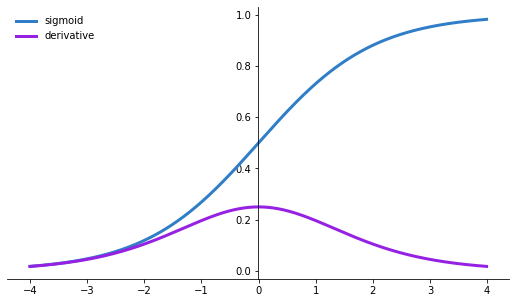

In [39]:
# let us plot both to see how they look 
x=np.arange(-4,4,0.01)
sigmoid(x)
# Setup centered axes
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# Create and show plot
ax.plot(x,sigmoid(x)[0], color="#307EC7", linewidth=3, label="sigmoid")
ax.plot(x,sigmoid(x)[1], color="#9621E2", linewidth=3, label="derivative")
ax.legend(loc="upper left", frameon=False)
fig.show()

We can observe at 0 the derivative is a bit higher than 0.2 and deminishes on each side of zero. As input moves away from zero the derivitive becomes zero. So for higher values of x (input) very little learning takes place. 

When is sigmoid used. 

(i) if you want output value between 0 to 1 use sigmoid at output layer neuron only
(ii) when you are doing binary classification problem use sigmoid


In [6]:
def tanh(x):
    t=(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    dt=1-t**2
    return t,dt


/Users/izualkernan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


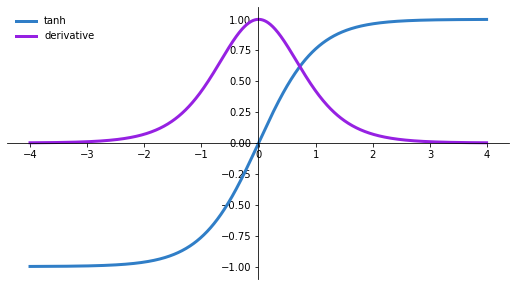

In [38]:
z=np.arange(-4,4,0.01)
#tanh(z)[0].size,tanh(z)[1].size
# Setup centered axes
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# Create and show plot
ax.plot(z,tanh(z)[0], color="#307EC7", linewidth=3, label="tanh")
ax.plot(z,tanh(z)[1], color="#9621E2", linewidth=3, label="derivative")
ax.legend(loc="upper left", frameon=False)
fig.show()

Tanh is different in that. 

(i)The output is zero centered because its range in between -1 to 1 i.e -1 < output < 1 .
(ii) In practice it is always preferred over Sigmoid function.

(iii) The derivitive still goes to zero quickly as we move away from zero. 

In [6]:
from collections import deque
def relu_function(x):
    if (x<0):
        return 0
    else:
        return x

def relu_df(x):
    if (x>=0): 
         return 1
    else: 
         return 0

def relu(x):
    t = map(relu_function, x)
    dt = map(relu_df,x)
    return t, dt

In [32]:
from collections import deque

z=np.arange(-4,4,0.01)
# Setup centered axes
a = relu(z)

# since these are generators, need to convert for plotting
rel = deque(maxlen=1000)
for d in a[0]:
  rel.append(d)
drel = deque(maxlen=1000)
for d in a[1]:
  drel.append(d)

/Users/izualkernan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


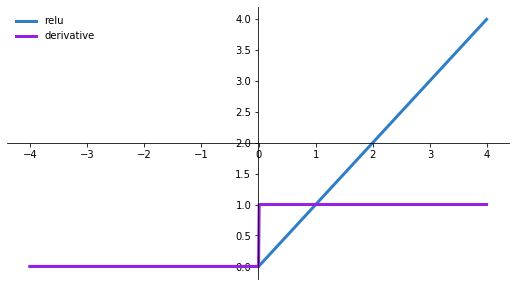

In [37]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# Create and show plot
ax.plot(z,rel, color="#307EC7", linewidth=3, label="relu")
ax.plot(z,drel, color="#9621E2", linewidth=3, label="derivative")
ax.legend(loc="upper left", frameon=False)
fig.show()

In [33]:
# Exercise:  Calculate the forward and backward pass of the example 
# nn by hand using a step by step approach


def relu(X):
   return np.maximum(0,X)

def reluDerivative(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

def loss(x,y):
    return (x-y)*(x-y)

# using arbirary weights
w1 = np.array([[0.1, 0.2, -0.1],[0.3, -0.001, -0.9]])
w2 = np.array([[0.001, 0.05, -0.23]])

# x and y
x = np.array([[2,3]])
y = 5

print("x=\n",x)
print("y=\n",y)


##  Forward Pass  ###

# z(1) = x . W1
z1 = np.dot(x,w1)
print("z1=\n",z1)
a1 = relu(z1)
print("a1=\n",a1)

# z2 = a1 . W2 T
z2 = np.dot(a1,w2.T)
print("z2=\n",z2)
a2 = relu(z2)
print("a2=\n",a2)

## Backward Pass ###

# calculate from last layer 
del2 = 2 * (a2[0][0]-5) * relu_df(z2[0][0])
print("del2=\n", del2)

# calculater del1 recursively

del1 = w2 * del2 * reluDerivative(z1)
print("del1=\n", del1)

# calculate all the derivitives

dlossdW2 = del2 * a1
print("dLoss/dW2=\n", dlossdW2)
dlossdW1 = np.dot(x.T,del1)
print("dLoss/dW1=\n", dlossdW1)

# update w1 and w2

eta = 0.001

print("original w1=\n", w1)
print("original w2=\n", w2)

# Update and print w1 and w2 

w1 = w1 - dlossdW1
print("Updated w1=\n",w1)
w2 = w2 - dlossdW2
print("Updated w2=\n",w2)

x=
 [[2 3]]
y=
 5
z1=
 [[ 1.1    0.397 -2.9  ]]
a1=
 [[1.1   0.397 0.   ]]
z2=
 [[0.02095]]
a2=
 [[0.02095]]
del2=
 -9.9581
del1=
 [[-0.0099581 -0.497905   0.       ]]
dLoss/dW2=
 [[-10.95391    -3.9533657  -0.       ]]
dLoss/dW1=
 [[-0.0199162 -0.99581    0.       ]
 [-0.0298743 -1.493715   0.       ]]
original w1=
 [[ 0.1    0.2   -0.1  ]
 [ 0.3   -0.001 -0.9  ]]
original w2=
 [[ 0.001  0.05  -0.23 ]]
Updated w1=
 [[ 0.1199162  1.19581   -0.1      ]
 [ 0.3298743  1.492715  -0.9      ]]
Updated w2=
 [[10.95491    4.0033657 -0.23     ]]
